# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*) 

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [2]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1 
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [3]:
df = pd.read_csv("tmdb_5000_movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

Homepage, tagline, overview, runtime, and release date. We could estimate some of these, but for other, it seems best to either delete the row or fill in a zero.
But there are also values for example in the budget column, which are 0, which also seems unrealistic.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [5]:
df = df[['title','overview','genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [6]:
df.dropna(inplace=True) # drop na values
df = df.reset_index(drop=True) # reset index
type(df)

/var/folders/xz/r4qpf3bd2m3fdd46txvk5j0h0000gn/T/ipykernel_37271/1537092560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True) # drop na values


pandas.core.frame.DataFrame

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [7]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
        labels_index = unique_labels.index(label)
    out[labels_index] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(row['genres'])

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row['proc_genres'], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 15586.85it/s]


Verify that one-hot encodings are indeed as expected

In [8]:
df["one_hot_genres"][0]
unique_values = df['genres'].unique()
print(unique_values)


['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 ...
 '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]']


### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

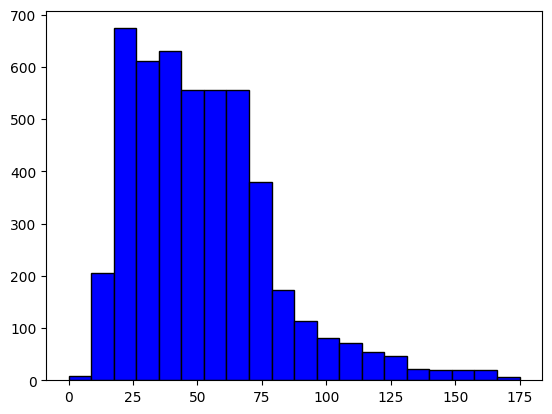

In [9]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for overview in df['overview']:
    text = remove_punctuation(overview.lower())
    processed_overviews.append(text)
df['proc_overview'] = processed_overviews

df['overview_len'] = df['proc_overview'].apply(lambda x: len(x.split()))


plt.hist(df["overview_len"], bins=20, color='blue', edgecolor="black")
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

0 words is the shortest, 175 words is the longest. Around 65 words, then most of the data is preserved.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [10]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]

truncated_overviews = []
for overview in df["proc_overview"]:
    words = overview.split()
    fifteen_words = words[:15]
    overview_truncated = ' '.join(fifteen_words)
    truncated_overviews.append(overview_truncated)

    

df["proc_overview"] = truncated_overviews

overview_lens = []

overview_lens = []
for processed_text in df["proc_overview"]:
    word_count = len(processed_text)  
    overview_lens.append(word_count)
df["overview_len"] = overview_lens
print(df["overview_len"])
# print to verify
df

0        78
1        77
2        76
3       102
4       101
       ... 
4794     88
4795     89
4797     98
4798     94
4799     82
Name: overview_len, Length: 4707, dtype: int64


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,78
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",captain barbossa long believed to be dead has ...,77
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,76
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,102
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,101
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,88
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,89
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,98
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,94


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [11]:
# hint: store all words for all movies in a set, change it to a list and sort

unique_words = set()

for overview in df['proc_overview']:
    unique_words.update(overview.split())


sorted_vocabulary = sorted(list(unique_words))
vocab_len = len(sorted_vocabulary)
print(vocab_len)
print(df['proc_overview'])

12493
0       in the 22nd century a paraplegic marine is dis...
1       captain barbossa long believed to be dead has ...
2       a cryptic message from bonds past sends him on...
3       following the death of district attorney harve...
4       john carter is a warweary former military capt...
                              ...                        
4794    adam a security guard travels from california ...
4795    el mariachi just wants to play his guitar and ...
4797    signed sealed delivered introduces a dedicated...
4798    when ambitious new york attorney sam is sent t...
4799    ever since the second grade when he first saw ...
Name: proc_overview, Length: 4707, dtype: object


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [12]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(sorted_vocabulary))
     # set of encodings for this overview
    for word in (row["proc_overview"].split()):
        word_encode = encode_labels(word, sorted_vocabulary)
        sentence_encode += word_encode 
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] 

100%|██████████| 4707/4707 [00:11<00:00, 410.71it/s]


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

12493 * 16 = 199,888

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

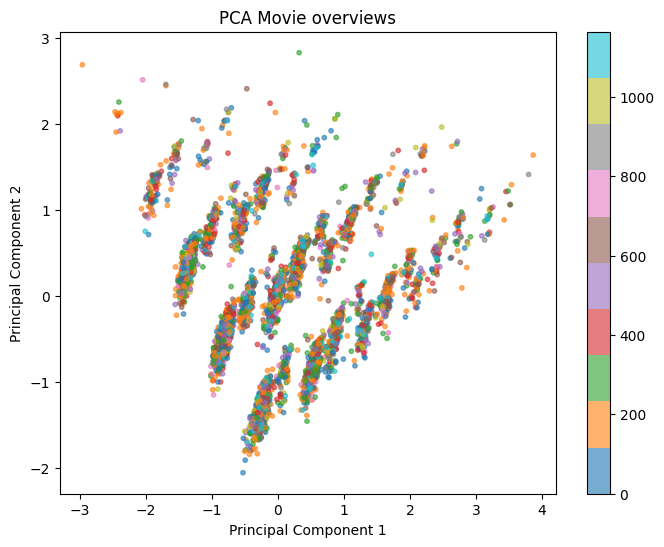

In [13]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
pca = PCA(n_components=2)
overview_list = df['one_hot_overview'].tolist()
overview_pca = pca.fit_transform(overview_list)
genre_labels = pd.factorize(df['proc_genres'])[0]

plt.figure(figsize=(8, 6))
scatterplt = plt.scatter(overview_pca[:, 0], overview_pca[:, 1], c=genre_labels, cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatterplt)
plt.title('PCA Movie overviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

No, the patterns shown above, are not really interpretable.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

Approximately, 88% of the variance is lost.

In [14]:

retained_variance = np.sum(pca.explained_variance_ratio_)

variance_lost = 1 - retained_variance
print(variance_lost)

0.887115491324773


**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

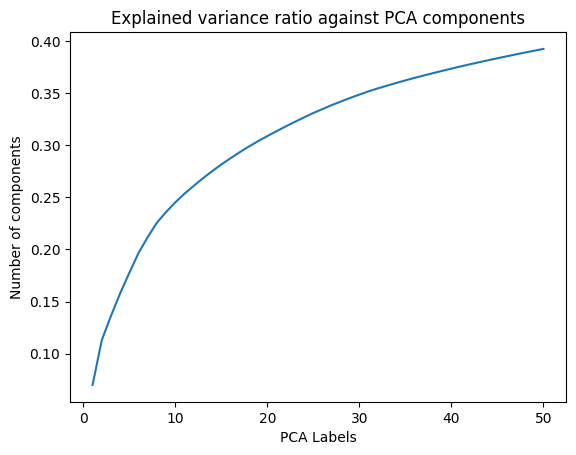

In [15]:
# Set up PCA object with the desired number of components
pca = PCA(n_components=50)
# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(overview_list)
# get explained variance ratio from object, store it in a list
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1,51), cumulative_explained_variance_ratio, )
# set up y label, x label, title 
plt.xlabel("PCA Labels")
plt.ylabel("Number of components")
plt.title("Explained variance ratio against PCA components")
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [16]:
pca_80 = PCA(n_components=2500)
labels_pca_80 = pca_80.fit(overview_list)
print(pca_80.explained_variance_)
explained_variance_ratio_80 = pca_80.explained_variance_ratio_

print(pca_80.explained_variance_ratio_[:20])

cum_var = np.cumsum(explained_variance_ratio_80)
num_compon = np.where(cum_var >= 0.8)[0][0] + 1
print(num_compon)

[1.01854465e+00 6.25904633e-01 3.39979306e-01 ... 8.25429916e-04
 8.25281761e-04 8.22487520e-04]
[0.0699188  0.04296571 0.02333815 0.02170388 0.01975387 0.0189935
 0.01524542 0.01389606 0.01015137 0.00933627 0.00827733 0.00748
 0.00726872 0.00685209 0.0064433  0.00596016 0.00578491 0.0054818
 0.0051445  0.00484237]
1227


1227

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [17]:
n_dims = 1227
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(overview_list)
df["overview_pca"] = list(labels_pca)

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0)

pca_list = list(df['overview_pca'])

kmeans.fit(pca_list)
y_preds = kmeans.predict(pca_list)
df["cluster_kmeans"] = y_preds 


print(df[df["cluster_kmeans"] == 0])

/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


                               title  \
32               Alice in Wonderland   
48             Jack the Giant Slayer   
49                  The Great Gatsby   
54                 The Good Dinosaur   
72                     Suicide Squad   
...                              ...   
4719               Facing the Giants   
4732               The Night Visitor   
4733  The Past Is a Grotesque Animal   
4752                        Counting   
4780                        Backmask   

                                               overview  \
32    Alice, an unpretentious and individual 19-year...   
48    The story of an ancient war that is reignited ...   
49    An adaptation of F. Scott Fitzgerald's Long Is...   
54    An epic journey into the world of dinosaurs wh...   
72    From DC Comics comes the Suicide Squad, an ant...   
...                                                 ...   
4719  A losing coach with an underdog football team ...   
4732  An insane Swedish farmer escapes from an 

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

No, not good clustering because movies from different genres are clustered together. For example, The Avengers and Pink flamingos

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

No, for a K of 30 there is no elbow in the plot

/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

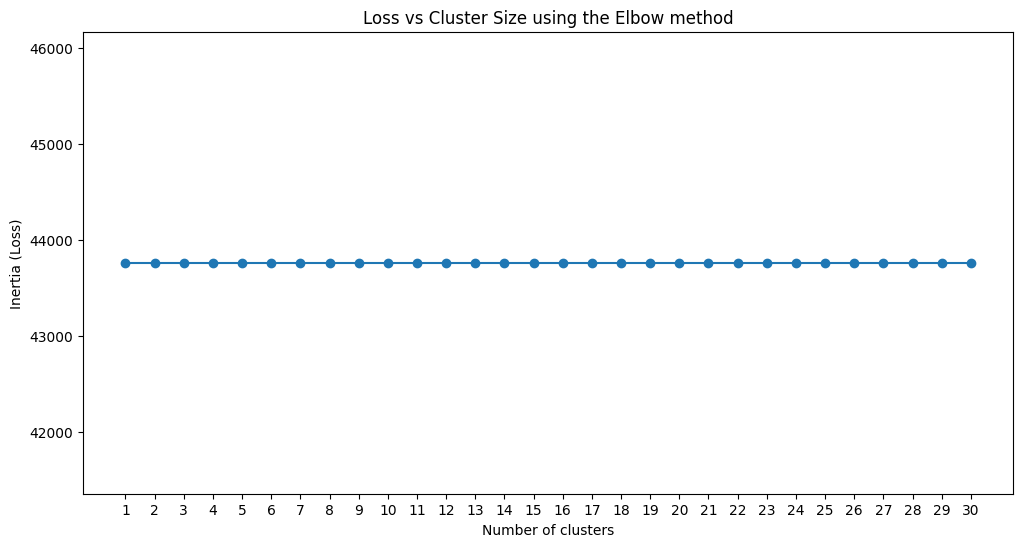

In [19]:
k_values = range(1,31)
inertia_list = []
for k in k_values:
    kmeans = KMeans(n_clusters=30, random_state=0).fit(pca_list)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_list, '-o')
plt.title('Loss vs Cluster Size using the Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Loss)')
plt.xticks(k_values)
plt.show()


# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20, random_state=0)
gmm.fit(pca_list)
cluster_gmm = gmm.predict(pca_list)
df['cluster_gmm'] = cluster_gmm
print(df[df['cluster_gmm'] == 3])

                                           title  \
9             Batman v Superman: Dawn of Justice   
12    Pirates of the Caribbean: Dead Man's Chest   
28                                Jurassic World   
41                                 Green Lantern   
43                          Terminator Salvation   
...                                          ...   
4757                       This Is Martin Bonner   
4763                              The Last Waltz   
4782                        Stories of Our Lives   
4793                                      Primer   
4797                   Signed, Sealed, Delivered   

                                               overview  \
9     Fearing the actions of a god-like Super Hero l...   
12    Captain Jack Sparrow works his way out of a bl...   
28    Twenty-two years after the events of Jurassic ...   
41    For centuries, a small but powerful force of w...   
43    All grown up in post-apocalyptic 2018, John Co...   
...                  

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

It seems okay, there are again some movies that don't fit in, for example: Green Lantern and Terminator, but there are also some that are good that they're in the same cluster.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

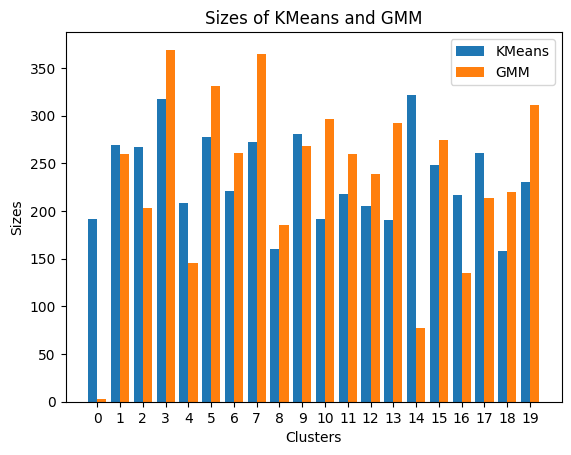

In [21]:
# Create an array for the x-axis positions
# Plotting the bars
# Add labels, title, and legend

kmeans_size = df['cluster_kmeans'].value_counts().sort_index()
gmm_size = df['cluster_gmm'].value_counts().sort_index()
clusters = sorted(set(kmeans_size.index) | set(gmm_size.index))

kmeans_size = kmeans_size.reindex(clusters, fill_value=0)
gmm_size = gmm_size.reindex(clusters, fill_value=0)

x = np.arange(len(clusters))
width = 0.4
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, kmeans_size, width, label='KMeans') # training accuracy: don't forget to add labels
bar2 = ax.bar(x + width/2, gmm_size, width, label='GMM') 


ax.set_xlabel("Clusters")
ax.set_ylabel("Sizes")
ax.set_title("Sizes of KMeans and GMM")

ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Yes, there is a signifant change in the sizes of the clusters. The GMM seems more uniform, this could be because GMM is supposed to be more flexible in terms of cluster shape.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [23]:
prev_watch = "Avatar"

cluster_kmeans = df[df['title'] == prev_watch]['cluster_kmeans'].iloc[0]# find what cluster index Avatar falls into for k-means
cluster_gmm = df[df['title'] == prev_watch]['cluster_gmm'].iloc[0] 

kmeans_recom = df[df['cluster_kmeans'] == cluster_kmeans]['title'].tolist()
gmm_recom = df[df['cluster_gmm'] == cluster_gmm]['title'].tolist()
# print out similar movies
print("recommendations based on KMeans:")
for movie in kmeans_recom[:10]:
    if movie != prev_watch:
        print(movie)

print("\nrecommendations based on GMM:")
for movie in gmm_recom[:10]:
    if movie != prev_watch:
        print(movie)

recommendations based on KMeans:
Tangled
Jupiter Ascending
Hugo
Dawn of the Planet of the Apes
The Hunger Games: Mockingjay - Part 2
The Sorcerer's Apprentice
Charlie and the Chocolate Factory
Mad Max: Fury Road
Final Fantasy: The Spirits Within

recommendations based on GMM:
Waterworld
Shin Godzilla
Poseidon
Charlie and the Chocolate Factory
Angels & Demons
The Revenant
R.I.P.D.
Pirates of the Caribbean: The Curse of the Black Pearl
San Andreas


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

Yes, they both recommend some movies that are suitable recommendations based on the Avatar movie

**Q6.3** How would you try making the recommender systems better?

Selecting clusters based on specifications, for example on other variables than the overview, such as ratings if those would be available

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

Combine those movies, and find new clusters based on those.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_mov = df[df['title'] == "Avatar"]['overview_pca'].iloc[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sim = cosine_sim(row['overview_pca'], prev_watch_mov)
    sims.append(sim)

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar") # sort df
print(df[['title', 'cos_sim_to_avatar']].head())

                                                  title  cos_sim_to_avatar
440                                    Four Christmases          -0.340215
3546                             A Room for Romeo Brass          -0.335803
406                                    Arthur Christmas          -0.323979
16                                         The Avengers          -0.323170
4632  The Incredibly True Adventure of Two Girls In ...          -0.321310


I wouldn't say that the movies listed above here are better than those from the clustering methods.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [25]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))
print(sorted(df_train))
print(df['one_hot_genres'])


3765 942
['cluster_gmm', 'cluster_kmeans', 'cos_sim_to_avatar', 'genres', 'one_hot_genres', 'one_hot_overview', 'overview', 'overview_len', 'overview_pca', 'proc_genres', 'proc_overview', 'title']
440     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3546    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
406     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
16      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4632    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
415     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1285    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3778    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3363    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_genres, Length: 4707, dtype: object


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def train_and_eval(model, train_X, train_y, test_X, test_y):
    """ Trains, times and evaluates a given instantiated model on data """

    start = perf_counter()               # check current (start) time
    model = model.fit(train_X, train_y)               # perform some code that you want to time
    end = perf_counter()                 # check current (end) time
    fit_time = end-start                 # compute interval

    # time inference over train score
    start = perf_counter()
    train_score = model.score(train_X, train_y)
    end = perf_counter()
    train_score_time = end-start

    # time inference over test score
    start = perf_counter()
    test_score = model.score(test_X, test_y)
    end = perf_counter()
    test_score_time = end-start

    return train_score, test_score, fit_time, train_score_time, test_score_time

X_train = np.array(df_train['overview_pca'].tolist())  
y_train = np.array(df_train['one_hot_genres'].tolist())  


X_test = np.array(df_test['overview_pca'].tolist()) 
y_test = np.array(df_test['one_hot_genres'].tolist()) 

architectures = [
    (50,),
    (100,),
    (100, 50),
    (100, 100),
    (50, 50, 50),
]

for architecture in architectures:

    mlp = MLPClassifier(hidden_layer_sizes=architecture, max_iter=400, random_state=42)


    train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(mlp, X_train, y_train, X_test, y_test)
    print(f'Current MLP architecture: {architecture}')
    print(f'The train score is: {train_score}')
    print(f'The test score is: {test_score}')
    print(f'The fitting time is: {fit_time}')
    print(f'The training score time is: {train_score_time}')
    print(f'The testing score time is: {test_score_time}')



/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Current MLP architecture: (50,)
The train score is: 0.9649402390438248
The test score is: 0.024416135881104035
The fitting time is: 74.358049875
The training score time is: 0.31078375000004144
The testing score time is: 0.0734762499999988


/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Current MLP architecture: (100,)
The train score is: 1.0
The test score is: 0.01592356687898089
The fitting time is: 92.49012291700001
The training score time is: 0.29322854199995163
The testing score time is: 0.0724884999999631


/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Current MLP architecture: (100, 50)
The train score is: 1.0
The test score is: 0.013800424628450107
The fitting time is: 84.46533175000013
The training score time is: 0.28486900000007154
The testing score time is: 0.07021637499997269


/Users/bartkoedijk/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Current MLP architecture: (100, 100)
The train score is: 1.0
The test score is: 0.01910828025477707
The fitting time is: 99.98196320900001
The training score time is: 0.2998711249999815
The testing score time is: 0.07615820799992434
Current MLP architecture: (50, 50, 50)
The train score is: 0.9875166002656043
The test score is: 0.008492569002123142
The fitting time is: 61.591055374999996
The training score time is: 0.2805833749998783
The testing score time is: 0.06922312500000771


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

Due to limited time, I haven't been able to tune my model that much, but as the topic of the coming week is about Deep Learning I thought that it would be nice to start learning about this topic already. Therefore, I have tried to keep the architecture of the MLP as simple as possible and use 'overview_pca' as inputs and 'one_hot_genres' as labels. As part of the tuning process, I've tried different architectures as can be seen above, to start experimenting with the use of different architectures for MLP models. Also, as can be seen, is the model very bad at predicting the genres. The best one of the architectures I've tested, scores 2.4% accuracy on the test set. The architecture of this MLP model is that it has one hidden layer and this layer contains 50 neurons.

If I would continue working on this, I would perhaps use GridSearchCV to automate the process of finding the best architecture and hyperparameters.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)